Shortest path from Islamabad to Karachi: ['Islamabad', 'Rawalpindi', 'Quetta', 'Karachi']


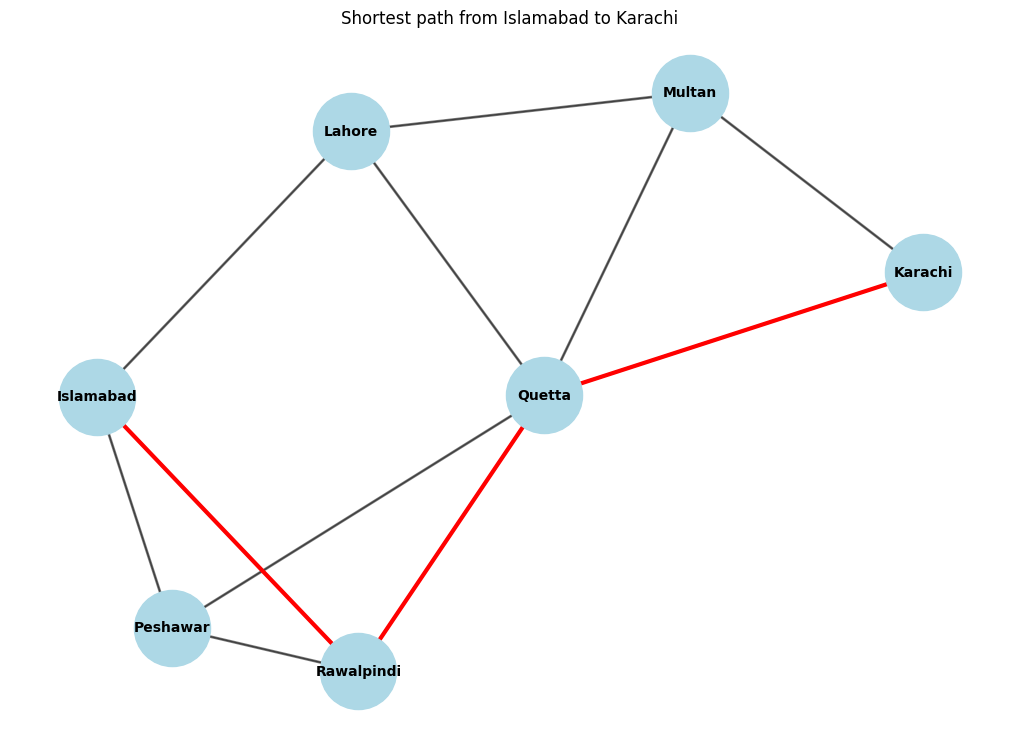

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Define the graph (cities and their connections)
graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

# BFS function to find the shortest path
def bfs_shortest_path(graph, start, goal):
    queue = deque([[start]])
    visited = set()

    while queue:
        path = queue.popleft()
        city = path[-1]

        if city == goal:
            return path

        if city not in visited:
            for neighbor in graph[city]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

            visited.add(city)

# Find the shortest path from Islamabad to Karachi
shortest_path = bfs_shortest_path(graph, 'Islamabad', 'Karachi')
print("Shortest path from Islamabad to Karachi:", shortest_path)

# Create a NetworkX graph from the dictionary
G = nx.Graph(graph)

# Draw the graph
plt.figure(figsize=(10, 7))

# Positions for all nodes
pos = nx.spring_layout(G, seed=42)

# Draw nodes, edges, and labels
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5)

# Highlight the shortest path in red
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='red')

# Display the graph
plt.title("Shortest path from Islamabad to Karachi")
plt.show()